* In the original version, I did not delete any outliers, trying to use the Scaling methods to handle them. Now I will actually remove any outliers in this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/banking_transactions_output_data/customer_behavior_df.csv')
df.drop(columns=['income', 'cust_id'], inplace=True)
df.head()

,hasSavings,incomeToSavingsRatio,hasCredit,creditSpendtoLimitRatio,hasChecking,averageMonthlySpending,numTnxMonthlyAverage
0,No,0.000000,No,0.000000,No,0.000000,0.000000
1,Yes,-196.441989,Yes,-0.046533,Yes,-114.890833,4.333333
2,Yes,93716.210526,Yes,0.031669,No,0.000000,0.000000
3,Yes,63066.813671,Yes,0.200554,Yes,-40.327500,7.750000
4,Yes,141441.269841,Yes,0.173563,Yes,-494.062727,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hasSavings               747 non-null    object 
 1   incomeToSavingsRatio     747 non-null    float64
 2   hasCredit                747 non-null    object 
 3   creditSpendtoLimitRatio  747 non-null    float64
 4   hasChecking              747 non-null    object 
 5   averageMonthlySpending   747 non-null    float64
 6   numTnxMonthlyAverage     747 non-null    float64
dtypes: float64(4), object(3)
memory usage: 41.0+ KB


In [4]:
df.describe()

,incomeToSavingsRatio,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage
count,7.470000e+02,747.000000,747.000000,747.000000
mean,1.438181e+04,-0.005156,-89.862092,6.173348
std,1.650565e+05,0.102669,199.535463,7.910584
min,-1.047294e+05,-1.000000,-1439.755000,0.000000
25%,0.000000e+00,-0.019007,-171.391310,0.000000
50%,0.000000e+00,0.000000,-9.595000,8.250000
75%,6.565271e+02,0.001192,0.000000,9.000000
max,4.032900e+06,0.938203,1625.430000,99.000000


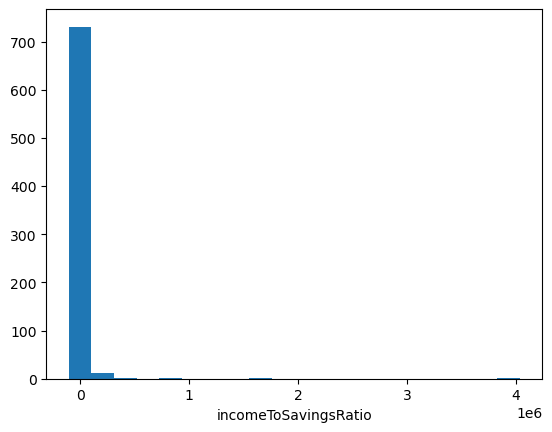

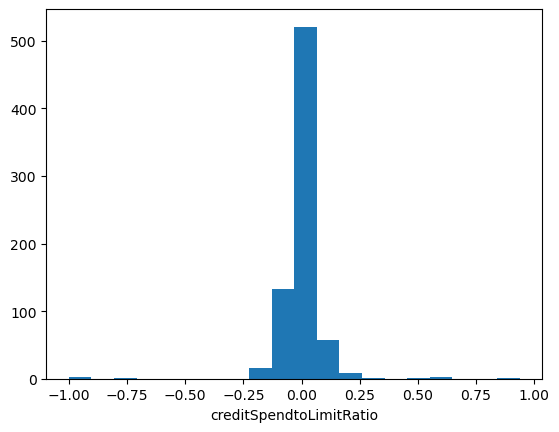

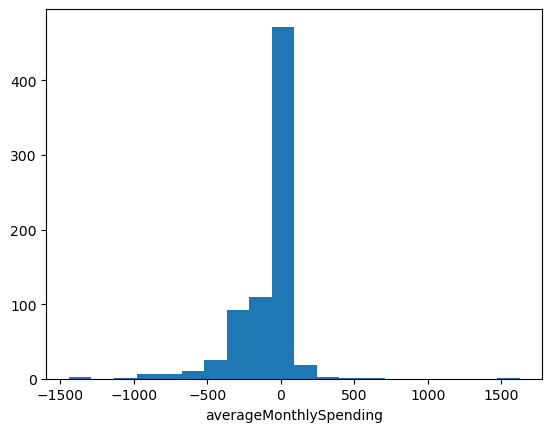

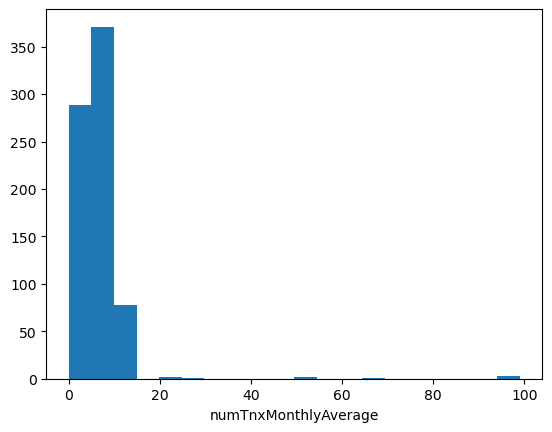

In [5]:
numerical_columns =  ['incomeToSavingsRatio',
                      'creditSpendtoLimitRatio',
                      'averageMonthlySpending',
                      'numTnxMonthlyAverage']
    
for col in numerical_columns:
    plt.hist(df[col], bins=20)
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

## Handling Outliers.

1 - Categorize `incomeToSavingsRatio` into `incomeToSavingsRanking`

2 - Visualize with boxplots to find and remove the outliers in the other columns

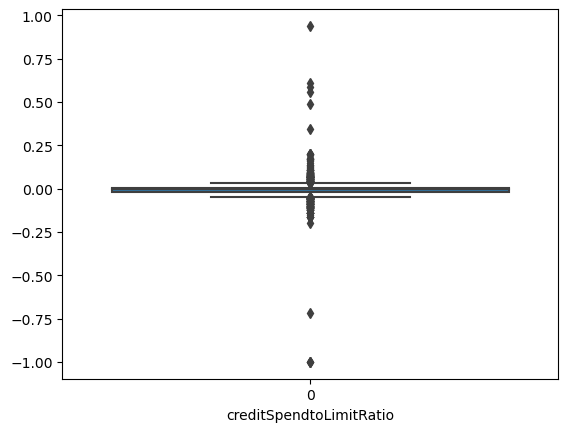

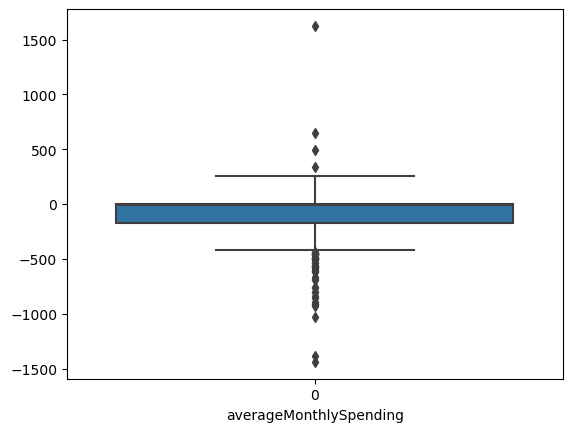

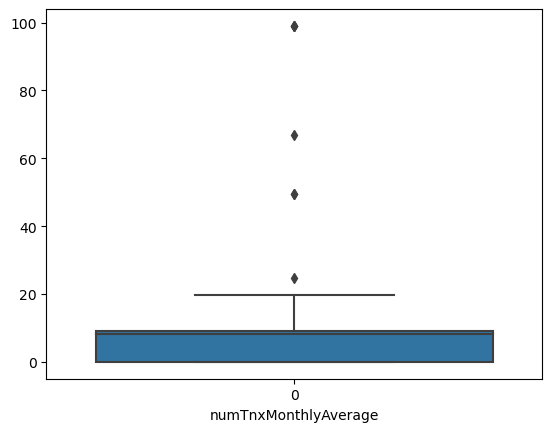

In [6]:
numerical_columns =  ['creditSpendtoLimitRatio',
                      'averageMonthlySpending',
                      'numTnxMonthlyAverage']
    
for col in numerical_columns:
    sns.boxplot(df[col])
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

In [7]:

# creditSpendtoLimitRatio
for idx in df.index:
    if df.loc[idx,'creditSpendtoLimitRatio'] > 0.2:
        df.loc[idx, 'creditSpendtoLimitRatio'] = 0.2
    if df.loc[idx,'creditSpendtoLimitRatio'] < -0.2:
        df.loc[idx, 'creditSpendtoLimitRatio'] = -0.2


# averageMonthlySpending
for idx in df.index:
    if df.loc[idx,'averageMonthlySpending'] > 500:
        df.loc[idx, 'averageMonthlySpending'] = 500
    if df.loc[idx,'averageMonthlySpending'] < -1000:
        df.loc[idx, 'averageMonthlySpending'] = -1000
        
# numTnxMonthlyAverage
for idx in df.index:
    if df.loc[idx,'numTnxMonthlyAverage'] > 20:
        df.loc[idx, 'numTnxMonthlyAverage'] = 20

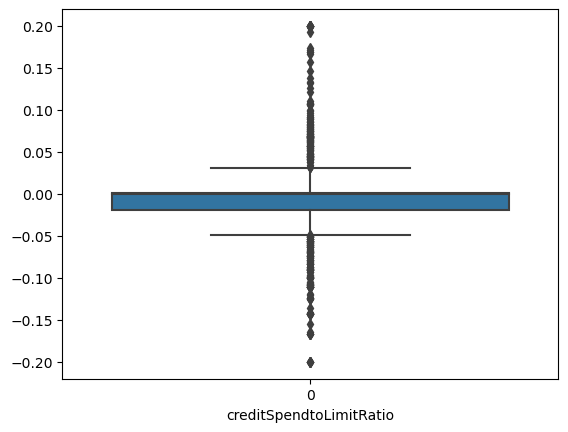

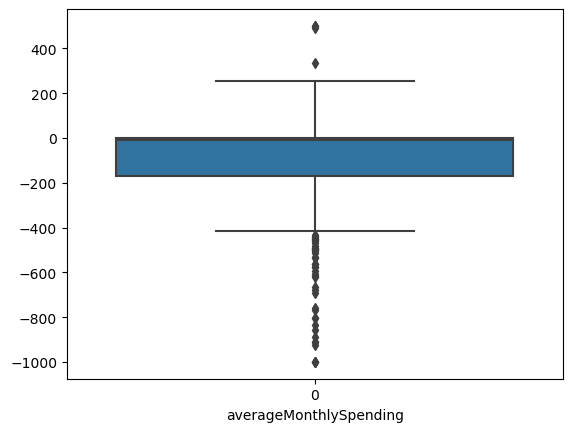

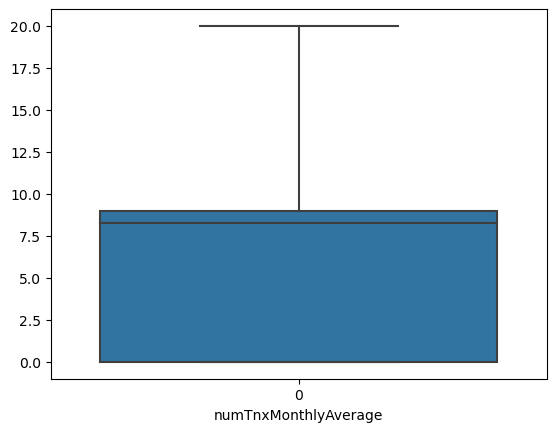

In [8]:
numerical_columns =  ['creditSpendtoLimitRatio',
                      'averageMonthlySpending',
                      'numTnxMonthlyAverage']
    
for col in numerical_columns:
    sns.boxplot(df[col])
#     df[col].plot(kind='hist', bins=10)
    plt.xlabel(col)
    plt.show()

In [9]:
df_encoded = df[numerical_columns]

## Scaling Categorical Values

It is recommended that categorical values should be scaled before clustering so as not to dominate the results

In [10]:
###############################
# using qcut to convert the incomeToSavingsRatio to equal bins
incomeToSavingsRanking = pd.qcut(df['incomeToSavingsRatio'], 
                        q=8,
                        duplicates='drop',
                       labels = ['Lowest', 'Low', 'Med', 'High', 'Highest'])

incomeToSavingsRanking.nunique(), incomeToSavingsRanking.unique()

(5,
 ['Low', 'Lowest', 'Highest', 'Med', 'High']
 Categories (5, object): ['Lowest' < 'Low' < 'Med' < 'High' < 'Highest'])

In [11]:
## Convert Ordinal Categorical data to numeric using Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['incomeToSavingsRanking'] = le.fit_transform(incomeToSavingsRanking)

# df.drop(columns='incomeToSavingsRatio', inplace=True)
df.head()

,hasSavings,incomeToSavingsRatio,hasCredit,creditSpendtoLimitRatio,hasChecking,averageMonthlySpending,numTnxMonthlyAverage,incomeToSavingsRanking
0,No,0.000000,No,0.000000,No,0.000000,0.000000,2
1,Yes,-196.441989,Yes,-0.046533,Yes,-114.890833,4.333333,3
2,Yes,93716.210526,Yes,0.031669,No,0.000000,0.000000,1
3,Yes,63066.813671,Yes,0.200000,Yes,-40.327500,7.750000,1
4,Yes,141441.269841,Yes,0.173563,Yes,-494.062727,9.000000,1


In [12]:
##################
# combine the binary columns into one ordinal categorical column with 0, 1, 2, 3 for numAccounts
binary_cat_columns = ['hasSavings', 'hasCredit', 'hasChecking']
# change Nos to 0s and Yess to 1 to reduce its scaling
df_binary_categories =df[binary_cat_columns]
for col in binary_cat_columns:
    tmp = df[col].apply(lambda x: 0 if x=='No' else 1) 
    df_binary_categories[col] = tmp
# checking the results
df_binary_categories['hasSavings'].value_counts()

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_40501/4178990660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary_categories[col] = tmp


1    420
0    327
Name: hasSavings, dtype: int64

In [13]:
# creating numAccounts 
numAccounts = df_binary_categories.sum(axis=1)
numAccounts

0      0
1      3
2      2
3      3
4      3
      ..
742    1
743    2
744    2
745    2
746    2
Length: 747, dtype: int64

In [14]:
# combining all results
df_encoded['numAccounts'] = numAccounts
df_encoded['incomeToSavingsRanking'] = df['incomeToSavingsRanking']
df_encoded.head()

/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_40501/3994467925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['numAccounts'] = numAccounts
/var/folders/yj/c676wyw500q1vyq2brsvcqtr0000gn/T/ipykernel_40501/3994467925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['incomeToSavingsRanking'] = df['incomeToSavingsRanking']


,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,numAccounts,incomeToSavingsRanking
0,0.000000,0.000000,0.000000,0,2
1,-0.046533,-114.890833,4.333333,3,3
2,0.031669,0.000000,0.000000,2,1
3,0.200000,-40.327500,7.750000,3,1
4,0.173563,-494.062727,9.000000,3,1


In [15]:
df_encoded.to_csv('../../data/banking_transactions_output_data/df_encoded.csv', index=False)

## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tmp = scaler.fit_transform(df_encoded)
scaled_df = pd.DataFrame(tmp, columns=df_encoded.columns)
scaled_df.describe()

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,numAccounts,incomeToSavingsRanking
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,0.489101,0.606387,0.285391,0.623382,0.483936
std,0.144499,0.122037,0.218216,0.330733,0.264162
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452482,0.552406,0.000000,0.333333,0.375000
50%,0.500000,0.660270,0.412500,0.666667,0.500000
75%,0.502980,0.666667,0.450000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Saving the data
scaled_df.to_csv('../../data/banking_transactions_output_data/scaled_df_v2.csv', index=False)
pd.read_csv('../../data/banking_transactions_output_data/scaled_df_v2.csv')

,creditSpendtoLimitRatio,averageMonthlySpending,numTnxMonthlyAverage,numAccounts,incomeToSavingsRanking
0,0.500000,0.666667,0.000000,0.000000,0.50
1,0.383667,0.590073,0.216667,1.000000,0.75
2,0.579173,0.666667,0.000000,0.666667,0.25
3,1.000000,0.639782,0.387500,1.000000,0.25
4,0.933909,0.337292,0.450000,1.000000,0.25
...,...,...,...,...,...
742,0.500000,0.573063,0.183333,0.333333,0.50
743,0.146327,0.666667,0.000000,0.666667,0.75
744,0.142857,0.617745,0.412500,0.666667,0.50
745,0.501288,0.606618,0.450000,0.666667,0.50
